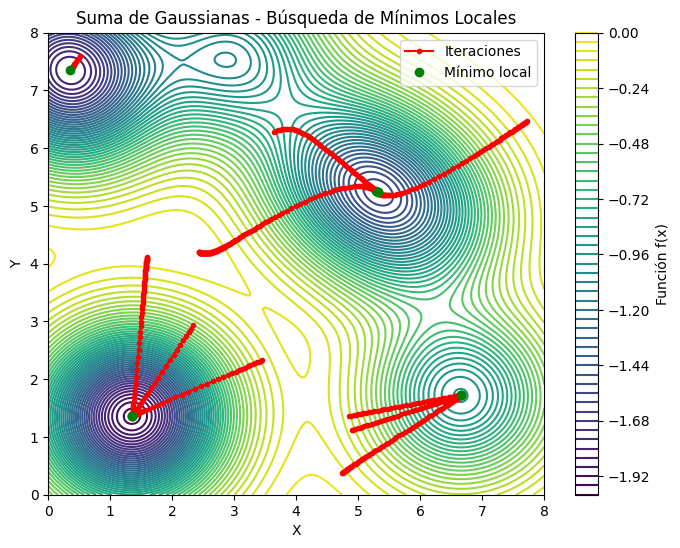

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 8
sigma = 1.0
np.random.seed(42)

x_i = np.random.uniform(0, 8, (k, 2))

def suma_gaussianas(x):
    return -np.sum(np.exp(-np.sum((x - x_i)**2, axis=1) / (2 * sigma)))

x = np.linspace(0, 8, 200)
y = np.linspace(0, 8, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([suma_gaussianas([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label='Función f(x)')

def gradiente(f, x, h=1e-5):
    return np.array([(f(x + h * np.eye(1, len(x), i)[0]) - f(x)) / h for i in range(len(x))])

def descenso_gradiente(x0, f, alpha=0.1, tol=1e-5, max_iter=150):
    x = x0
    trayectoria = [x0]
    for _ in range(max_iter):
        grad = gradiente(f, x)
        x_new = x - alpha * grad
        trayectoria.append(x_new)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(trayectoria), x

leyenda_agregada = False  # Control para la leyenda

puntos_iniciales = [np.random.uniform(0, 8, 2) for _ in range(10)]
for punto in puntos_iniciales:
    trayectoria, minimo = descenso_gradiente(punto, suma_gaussianas)
    plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-')
    plt.plot(minimo[0], minimo[1], 'go')
    if not leyenda_agregada:
        plt.plot([], [], 'r.-', label='Iteraciones')
        plt.plot([], [], 'go', label='Mínimo local')
        leyenda_agregada = True

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Suma de Gaussianas - Búsqueda de Mínimos Locales')
plt.show()


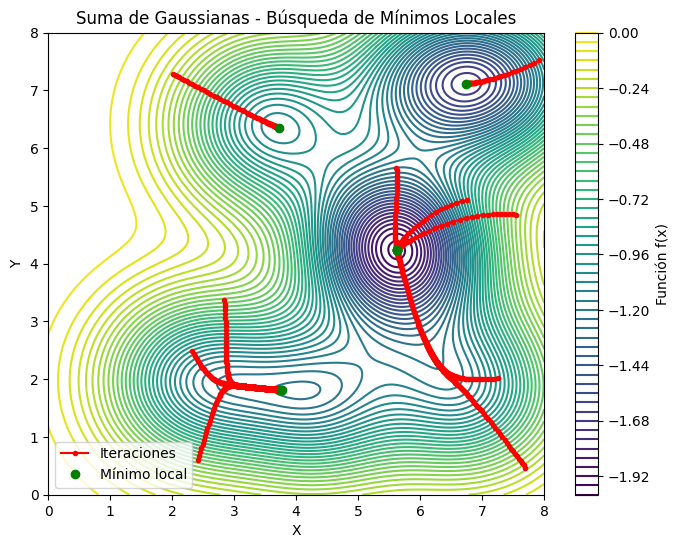

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 8
sigma = 1.0
np.random.seed(49)

x_i = np.random.uniform(0, 8, (k, 2))

def suma_gaussianas(x):
    return -np.sum(np.exp(-np.sum((x - x_i)**2, axis=1) / (2 * sigma)))

x = np.linspace(0, 8, 200)
y = np.linspace(0, 8, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([suma_gaussianas([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label='Función f(x)')

def gradiente(f, x, h=1e-5):
    return np.array([(f(x + h * np.eye(1, len(x), i)[0]) - f(x)) / h for i in range(len(x))])

def descenso_gradiente(x0, f, alpha=0.1, tol=1e-5, max_iter=300):
    x = x0
    trayectoria = [x0]
    for _ in range(max_iter):
        grad = gradiente(f, x)
        x_new = x - alpha * grad
        trayectoria.append(x_new)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(trayectoria), x

leyenda_agregada = False  # Control para la leyenda

puntos_iniciales = [np.random.uniform(0, 8, 2) for _ in range(10)]
for punto in puntos_iniciales:
    trayectoria, minimo = descenso_gradiente(punto, suma_gaussianas)
    plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-')
    plt.plot(minimo[0], minimo[1], 'go')
    if not leyenda_agregada:
        plt.plot([], [], 'r.-', label='Iteraciones')
        plt.plot([], [], 'go', label='Mínimo local')
        leyenda_agregada = True

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Suma de Gaussianas - Búsqueda de Mínimos Locales')
plt.show()
